# Gaussian Process Regression with Scikit-Learn

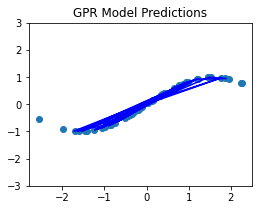

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct, RBF
import matplotlib.pyplot as plt
import numpy as np

# Random seeds
np.random.seed(seed=0)  # Set seed for NumPy
random_state = 0

# Generate features, and take norm for use with target
x = np.random.normal(loc=0, scale=1, size=(50, 1))
y = np.sin(x)

# Create kernel and define GPR
kernel = RBF() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

# Fit GPR model
gpr.fit(x, y)

# Create test data
x_test = np.random.normal(loc=0, scale=1, size=(50, 1))
y_test = np.sin(x_test)
 
# Predict mean
y_hat, y_sigma = gpr.predict(x_test, return_std=True)

# Initialize plot
f, ax = plt.subplots(1, 1, figsize=(4, 3))

# Squeeze data
x = np.squeeze(x)
y = np.squeeze(y)
x_test = np.squeeze(x_test)
y_test = np.squeeze(y_test)

# Plot the training data
ax.scatter(x, y)

# Plot predictive means as blue line
ax.plot(x_test, y_hat, 'b')

# Shade between the lower and upper confidence bounds
lower = x_test - y_sigma
upper = x_test + y_sigma
ax.fill_between(x_test, lower, upper, alpha=0.5)
ax.set_ylim([-3, 3])
plt.title("GPR Model Predictions")
plt.show()